# 고양이 수염 스티커를 적절한 위치에 붙이는지 확인하는 실험

다양한 이미지에 대해서 얼굴 탐지가 가능한지 궁금하여 ChatGPT로 이미지 생성 후, 진행

### import library

In [1]:
# library import
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


### 이미지 확인

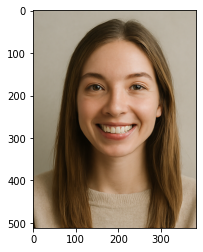

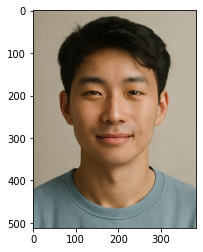

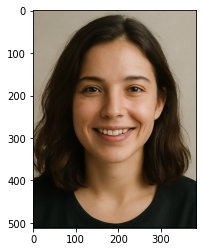

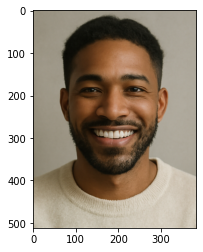

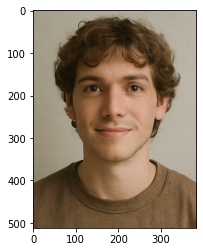

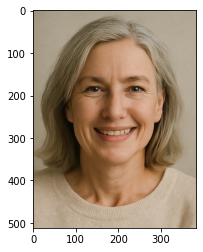

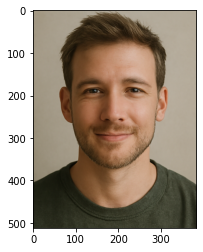

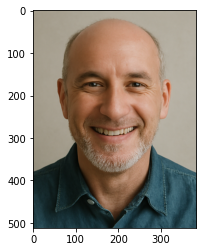

In [2]:
# GPT가 생성한 이미지 확인
for num in range(1,9):
    image_path = f"./project-images/portrait_{num}.png"
    img_bgr = cv2.imread(image_path)    # 이미지 불러오기
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)   # bgr -> rgb로 convert
    plt.imshow(img_rgb)    # 시각화 준비(figure위로 올리기)
    plt.show()    # 이미지를 출력

In [3]:
# 얼굴 이미지 파일을 잘 사용할 수 있게 rgb 파일들의 이미스로 저장

face_images = []
face_images_bgr = []

for num in range(1,9):
    image_path = f"./project-images/portrait_{num}.png"
    img_bgr = cv2.imread(image_path)    # 이미지 불러오기
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)   # bgr -> rgb로 convert
    face_images.append(img_rgb)
    face_images_bgr.append(img_bgr)

In [4]:
# 확인코드
# face_images

In [5]:
# 확인 코드
# for img in face_images:
#     plt.imshow(img)
#     plt.show()

### 고양이 수염 스티커 확인

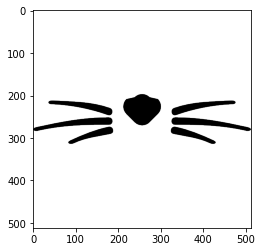

In [6]:
# 고양이 수염 스티커 확인
whiskers = "./project-images/cat-whiskers.png"
whiskers_bgr = cv2.imread(whiskers, cv2.IMREAD_UNCHANGED)
plt.imshow(whiskers_bgr)
plt.show()

### 얼굴 검출 & 랜드마크 검출

dlib의 기본 얼굴 감지기로 얼굴을 사각형 형태로 검출합니다

In [7]:
detector_hog = dlib.get_frontal_face_detector()   # 기본 얼굴 감지기를 반환

dlib의 detector(얼굴 감지기)로 감지한 사각형 정보 출력
rectangles[[(92, 118) (315, 341)]]


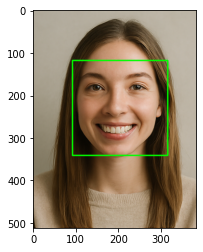

dlib의 detector(얼굴 감지기)로 감지한 사각형 정보 출력
rectangles[[(97, 139) (283, 325)]]


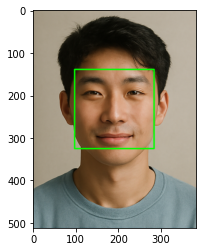

dlib의 detector(얼굴 감지기)로 감지한 사각형 정보 출력
rectangles[[(68, 118) (291, 341)]]


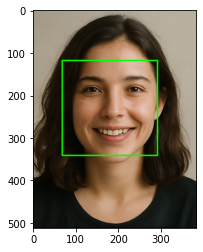

dlib의 detector(얼굴 감지기)로 감지한 사각형 정보 출력
rectangles[[(68, 118) (291, 341)]]


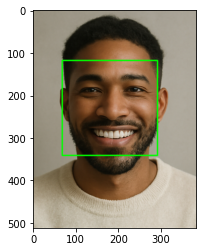

dlib의 detector(얼굴 감지기)로 감지한 사각형 정보 출력
rectangles[[(68, 118) (291, 341)]]


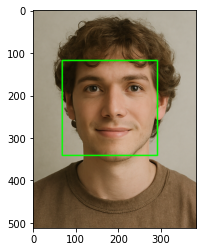

dlib의 detector(얼굴 감지기)로 감지한 사각형 정보 출력
rectangles[[(92, 118) (315, 341)]]


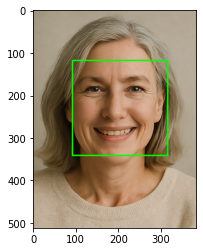

dlib의 detector(얼굴 감지기)로 감지한 사각형 정보 출력
rectangles[[(68, 118) (291, 341)]]


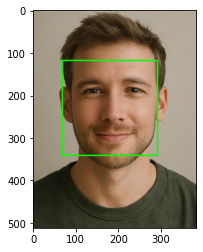

dlib의 detector(얼굴 감지기)로 감지한 사각형 정보 출력
rectangles[[(52, 112) (319, 379)]]


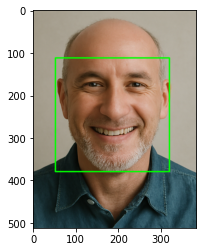

In [8]:
# 얼굴 이미지들의 dlib_rects를 저장한 리스트 할당
face_dlib_rects_list = []

# GPT가 생성한 이미지 확인
for img in face_images:
   
    # detector_hog(얼굴 감지기)로 감지한 이미지 확인
    dlib_rects = detector_hog(img,1)    # image pyramid = 1
    
    # face_dlib_rects_list에 추가
    face_dlib_rects_list.append(dlib_rects)
    
    print("dlib의 detector(얼굴 감지기)로 감지한 사각형 정보 출력")
    print(dlib_rects)
    for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
        l = dlib_rect.left() # 왼쪽
        t = dlib_rect.top() # 위쪽
        r = dlib_rect.right() # 오른쪽
        b = dlib_rect.bottom() # 아래쪽

        cv2.rectangle(img, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    
    plt.imshow(img)    # 시각화 준비(figure위로 올리기)
    plt.show()    # 이미지를 출력

랜드마크를 검출합니다.

In [9]:
# dlib의 저장된 모델을 불러옴
model_path = "./project-models/shape_predictor_68_face_landmarks.dat"
# dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
# landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
# dlib.rectangle: 내부를 예측하는 박스
# dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
landmark_predictor = dlib.shape_predictor(model_path)

In [10]:
# 이미지와, 얼굴 감지 사각형을 input으로하고, 램드 마크의 위치들을 저장한 list를 반환하는 함수 생성
def get_list_landmarks(img_rgb, dlib_rect):
    list_landmarks = []
    for dlib_rect in dlib_rects:
        # 모든 landmark의 위치정보를 points 변수에 저장
        points = landmark_predictor(img_rgb, dlib_rect)
        
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        
        # list_landmarks에 랜드마크 리스트를 저장
        list_landmarks.append(list_points)
        
        # 하나의 이미지에 얼굴이 n개인 경우 len(list_landmarks) = n,
        # 하나의 이미지에 각 얼굴들에 68개의 랜드마크 위치가 나열된 list를 반환
        
        # 아래의 코드는 68
        # print(len(list_landmarks[0]))
    return list_landmarks

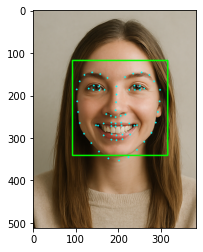

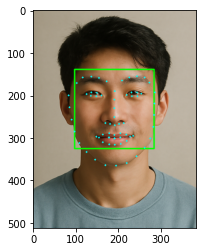

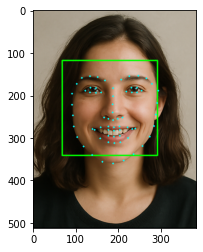

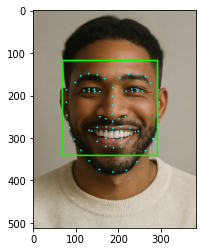

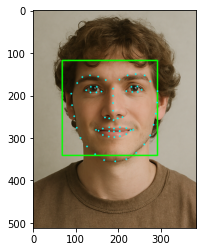

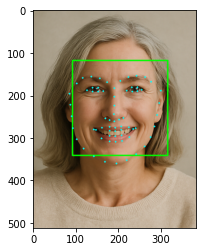

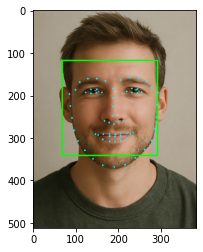

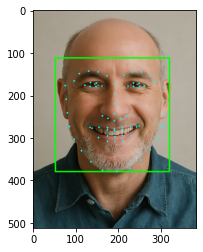

In [11]:
# 랜드마크가 표시된 이미지 출력
face_list_landmarks = []
for img, rects in zip(face_images, face_dlib_rects_list):
    list_landmarks = get_list_landmarks(img, rects)
    face_list_landmarks.append(list_landmarks)
    for landmark in list_landmarks:
        for point in landmark:
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)
            cv2.circle(img, point, 2, (0, 255, 255), -1)
    

    # 이미지를 준비
    plt.imshow(img)
    # 이미지를 출력
    plt.show()
    

![landmark location](./project-images/landmark_location.png)

고양이 수염이 코 양 주변으로 모양이 되어 있어 30번으로 놓을자리를 계산한다

In [12]:
face_xywh_list = []
for dlib_rects, list_landmarks in zip(face_dlib_rects_list, face_list_landmarks):
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        print(landmark[30])      # 코의 index -> 30
        x = landmark[30][0]    # 코의 x
        y = landmark[30][1]    # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2
        w = h = dlib_rect.width()     # 얼굴 영역의 가로를 차지하는 픽셀의 수 
        face_xywh_list.append([x,y,w,h])
        print (f'(x,y) : ({x},{y})')
        print (f'(w,h) : ({w},{h})')

(193, 235)
(x,y) : (193,235)
(w,h) : (224,224)
(190, 251)
(x,y) : (190,251)
(w,h) : (187,187)
(186, 240)
(x,y) : (186,240)
(w,h) : (224,224)
(185, 244)
(x,y) : (185,244)
(w,h) : (224,224)
(187, 236)
(x,y) : (187,236)
(w,h) : (224,224)
(189, 244)
(x,y) : (189,244)
(w,h) : (224,224)
(187, 248)
(x,y) : (187,248)
(w,h) : (224,224)
(190, 243)
(x,y) : (190,243)
(w,h) : (268,268)


In [13]:
# 위에서 불러온 whiskers_bgr을 사용
sticker_resized_list = []

for x,y,w,h in face_xywh_list:
    
    img_sticker = cv2.resize(whiskers_bgr, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
    sticker_resized_list.append(img_sticker)
    print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(224, 224, 4)
(187, 187, 4)
(224, 224, 4)
(224, 224, 4)
(224, 224, 4)
(224, 224, 4)
(224, 224, 4)
(268, 268, 4)


원본 이미지에 스티커 이미지를 추가하기 위해 x,y 좌표를 조정

In [14]:
face_refined_list = []
for x,y,w,h in face_xywh_list:

    refined_x = x - w // 2 
    refined_y = y - h //2
    face_refined_list.append((refined_x, refined_y))
    print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (81,123)
(x,y) : (97,158)
(x,y) : (74,128)
(x,y) : (73,132)
(x,y) : (75,124)
(x,y) : (77,132)
(x,y) : (75,136)
(x,y) : (56,109)


In [15]:
# 왕관 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.

new_face_refined_list = []
new_sticker_resized_list = []

for (refined_x, refined_y), img_sticker in zip(face_refined_list, sticker_resized_list):
    if refined_x < 0: 
        img_sticker = img_sticker[:, -refined_x:]
        refined_x = 0
    # 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
    if refined_y < 0:
        img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
        refined_y = 0
        
    new_face_refined_list.append((refined_x, refined_y))
    new_sticker_resized_list.append(img_sticker)
    
    print (f'(x,y) : ({refined_x},{refined_y})')

face_refined_list = new_face_refined_list
sticker_resized_list = new_sticker_resized_list

(x,y) : (81,123)
(x,y) : (97,158)
(x,y) : (74,128)
(x,y) : (73,132)
(x,y) : (75,124)
(x,y) : (77,132)
(x,y) : (75,136)
(x,y) : (56,109)


In [16]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)

img_show_list = []

for img_show, (refined_x, refined_y),  img_sticker in zip(face_images_bgr, face_refined_list, sticker_resized_list ):

    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
    
    img_show_list.append(img_show)
    

ValueError: operands could not be broadcast together with shapes (224,224,4) (224,224,3) (224,224,4) 

스티커를 불러올때 whiskers_bgr = cv2.imread(whiskers, cv2.IMREAD_UNCHANGED) 투명배경으로 불러와서 오류가 발생했다.  

BGR과 Alpha를 나눠서 처리해서 투명배경을 유지한다.

In [19]:
img_show_list = []

for img_show, (refined_x, refined_y), img_sticker in zip(face_images_bgr, face_refined_list, sticker_resized_list):

    # 스티커 채널 분리
    if img_sticker.shape[2] == 4:    # img_sticker.shape가 (H, W, 4)일 경우 → 4번째 채널은 알파 채널 (투명도)
        # 색상 채널 (gbr)만 분리
        sticker_rgb = img_sticker[..., :3]
        # 알파 채털(투명도) 분리
        sticker_alpha = img_sticker[..., 3] / 255.0  # normalize 0~1
        sticker_alpha = sticker_alpha[..., np.newaxis]  # 차원 맞추기 (H, W) → (H, W, 1) 
    else:
        # 만약 알파 채널이 없으면 (RGB만 있는 경우)
        sticker_rgb = img_sticker
        sticker_alpha = np.ones_like(sticker_rgb[..., :1])  # alpha 1이면 완전 불투명, 알파 채널이 없어서 1로 설정

    # 참고: alpha가 0이면 완전 투명, 1이면 완전 불투명
        
    # 좌표 정의
    h, w = sticker_rgb.shape[:2]
    y1, y2 = refined_y, refined_y + h
    x1, x2 = refined_x, refined_x + w

    # 이미지 범위 벗어날 경우 방어 코드
    img_h, img_w = img_show.shape[:2]
    if y1 < 0 or y2 > img_h or x1 < 0 or x2 > img_w:
        print(f"스티커 범위 초과: skip ({x1}, {y1}) to ({x2}, {y2})")
        continue

    # 덮어쓸 원본 이미지 영역 잘라오기
    sticker_area = img_show[y1:y2, x1:x2]

    # 알파 블렌딩
    # 두명도 기반 블렌딩 공식: 출력 픽셀 = 스티커_RGB * alpha + 원본_영역 * (1 - alpha)
    # 이 계산으로 투명한 부분은 원본이 그대로 보이고, 불투명한 부분은 스티커가 섞임
    blended = (sticker_rgb * sticker_alpha + sticker_area * (1 - sticker_alpha)).astype(np.uint8)

    # 덮어쓰기: blended된 영역을 원본 이미지 위에 덮어씌움
    img_show[y1:y2, x1:x2] = blended

    img_show_list.append(img_show)


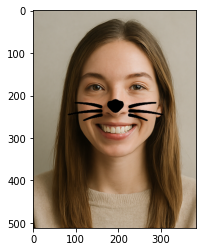

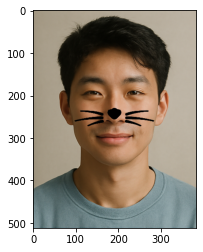

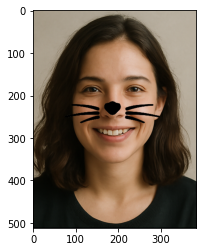

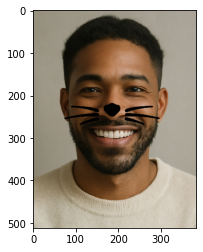

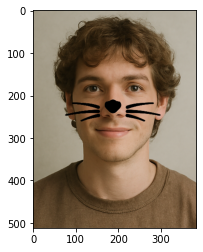

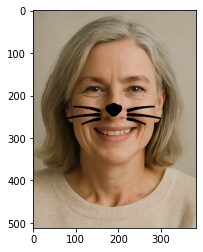

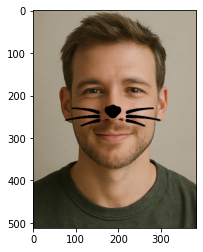

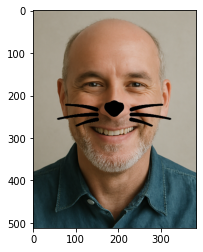

In [18]:
for img_show in img_show_list:
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.show()

# 회고

이미지 데이터는 rgb에 투명도까지 있어서 고려해야 할 사항이 많아 다루는게 어렵게 느껴진다.  
시간이 부족해서 이번에는 진행하지 못했지만, 여러 이미지를 처리할 수 있도록 함수로 만들어서 처리해야 좋을 것 같다.  